#Build Model

Import needed moduels

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

784 as all images are 28x28 pixels.

In [2]:
inputs = tf.keras.Input(shape=(784,))

Defines first layer of neurons. Transforms 794 inputs into 64 using the relu function. Then applies function to inputs.

In [3]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

Passes x into the next layer also 64 dimensions to extract features.
Passes these to a final layout of 10 dimension representation 0 - 9 as outputs.

In [4]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

Uses the defined layers to build the model. Then displays useful information about the model.

In [5]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="M_model")
model.summary()

Model: "M_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Loads training and testing data. Image pixels are between 0 - 255 so divide by 255 to get between 0 - 1  

In [6]:
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
xTrain = xTrain.reshape(60000, 784).astype("float32")/255
xTest = xTest.reshape(10000, 784).astype("float32")/255


11501568/11490434 [==============================] - 0s 0us/step


Compliles model to something that can be used.

1. Need a loss function to determine how good its predictions are.
1. An Optimiser
1. Accuracy metrics to report on how accurate the predictions are.

Then train the model.

In [7]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(xTrain, yTrain, batch_size=64, epochs=2, validation_split=0.2)
testScore = model.evaluate(xTest, yTest, verbose=2)
print("Test Accuracy: ", testScore[1])

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3459 - accuracy: 0.9003 - val_loss: 0.1898 - val_accuracy: 0.9438
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1575 - accuracy: 0.9526 - val_loss: 0.1419 - val_accuracy: 0.9586
313/313 - 0s - loss: 0.1441 - accuracy: 0.9581 - 359ms/epoch - 1ms/step
Test Accuracy:  0.9581000208854675


#Confusion Matrix

Imports for the confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Uses the model to make predictions

In [9]:
predictions = model.predict(xTest).argmax(axis=1)

Creates a confusion matrix

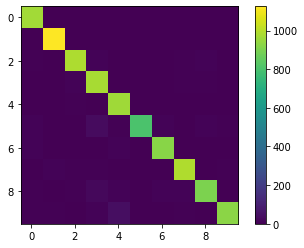

In [10]:
cMatrix = confusion_matrix(yTest, predictions)
plt.imshow(cMatrix)
plt.colorbar()

Shows the matrix

In [ ]:
plt.show()